In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from datetime import datetime
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
import math

# Reading only Issue Date to see patterns in date

In [2]:
date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")

In [3]:
data_2013_14 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
                                 usecols=['Issue Date'],
                                 dtype={'Issue Date':'str'},
                                 parse_dates=['Issue Date'],
                                 date_parser=date_parser)

In [63]:
data_2015 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2015.csv',
                       usecols=['Issue Date'],
                       dtype={'Issue Date':'str'},
                       parse_dates=['Issue Date'],
                       date_parser=date_parser)

In [64]:
data_2016 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2016.csv',
                       usecols=['Issue Date'],
                       dtype={'Issue Date':'str'},
                       parse_dates=['Issue Date'],
                       date_parser=date_parser)

In [65]:
data_2017 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
                       usecols=['Issue Date'],
                       dtype={'Issue Date':'str'},
                       parse_dates=['Issue Date'],
                       date_parser=date_parser)

In [5]:
data_2013_14.head()

,Issue Date
0,2013-08-04
1,2013-08-04
2,2013-08-05
3,2013-08-05
4,2013-08-08


In [66]:
year_count = defaultdict(int)
month_count = defaultdict(int)

data_13_17 = [data_2013_14,data_2015,data_2016,data_2017]

for data in data_13_17:
    for date in data['Issue Date']:
        month_count[date.month_name()] += 1
        year_count[str(date.year)] += 1    

In [67]:
month_count

defaultdict(int,
            {'August': 3455617,
             'July': 2729530,
             'March': 3852356,
             'June': 3710541,
             'May': 3840294,
             'September': 3758123,
             'April': 3602097,
             'October': 3987212,
             'January': 3809913,
             'February': 3054514,
             'December': 3055935,
             'November': 3483306})

In [68]:
year_count

defaultdict(int,
            {'2013': 4379883,
             '2015': 11739781,
             '2031': 99,
             '2014': 10538388,
             '2000': 956,
             '2010': 356,
             '2009': 16,
             '2011': 424,
             '2012': 966,
             '2017': 5433327,
             '2019': 988,
             '2018': 1774,
             '2001': 118,
             '2053': 2,
             '2002': 13,
             '2016': 10241308,
             '2032': 3,
             '2021': 70,
             '2023': 41,
             '2008': 22,
             '2006': 39,
             '2003': 46,
             '2041': 42,
             '2049': 3,
             '2005': 36,
             '1973': 16,
             '2030': 69,
             '2004': 104,
             '2007': 35,
             '2044': 9,
             '2060': 7,
             '2020': 72,
             '2033': 11,
             '2045': 3,
             '1971': 7,
             '2043': 11,
             '2069': 8,
             '2027': 56,
    

In [77]:
month_count_ordered = {'January':0,
                       'February':0,
                       'March':0,
                       'April':0,
                       'May':0,
                       'June':0,
                       'July':0,
                       'August':0,
                       'September':0,
                       'October':0,
                       'November':0,
                       'December':0}

for key in month_count_ordered:
    month_count_ordered[key] = month_count[key]

In [78]:
month_count_ordered

{'January': 3809913,
 'February': 3054514,
 'March': 3852356,
 'April': 3602097,
 'May': 3840294,
 'June': 3710541,
 'July': 2729530,
 'August': 3455617,
 'September': 3758123,
 'October': 3987212,
 'November': 3483306,
 'December': 3055935}

# Parking fine frequency by month in Issue Date 

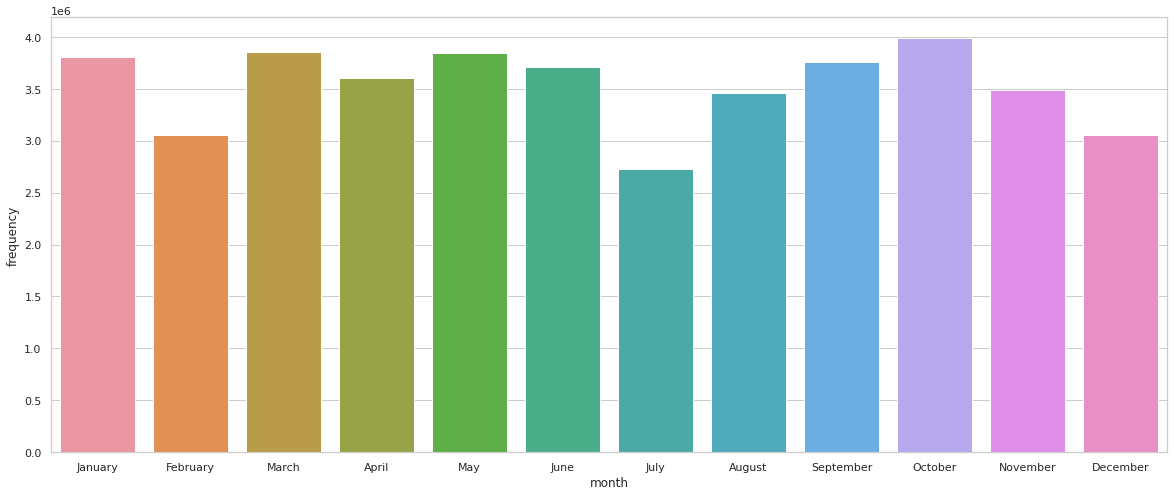

In [79]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
df_month_count = pd.DataFrame(month_count_ordered.items(),columns=['month','frequency'])
sns.barplot(x = "month", y = "frequency", ax=ax, data=df_month_count)

# Parking fine frequency by year in Issue Date 

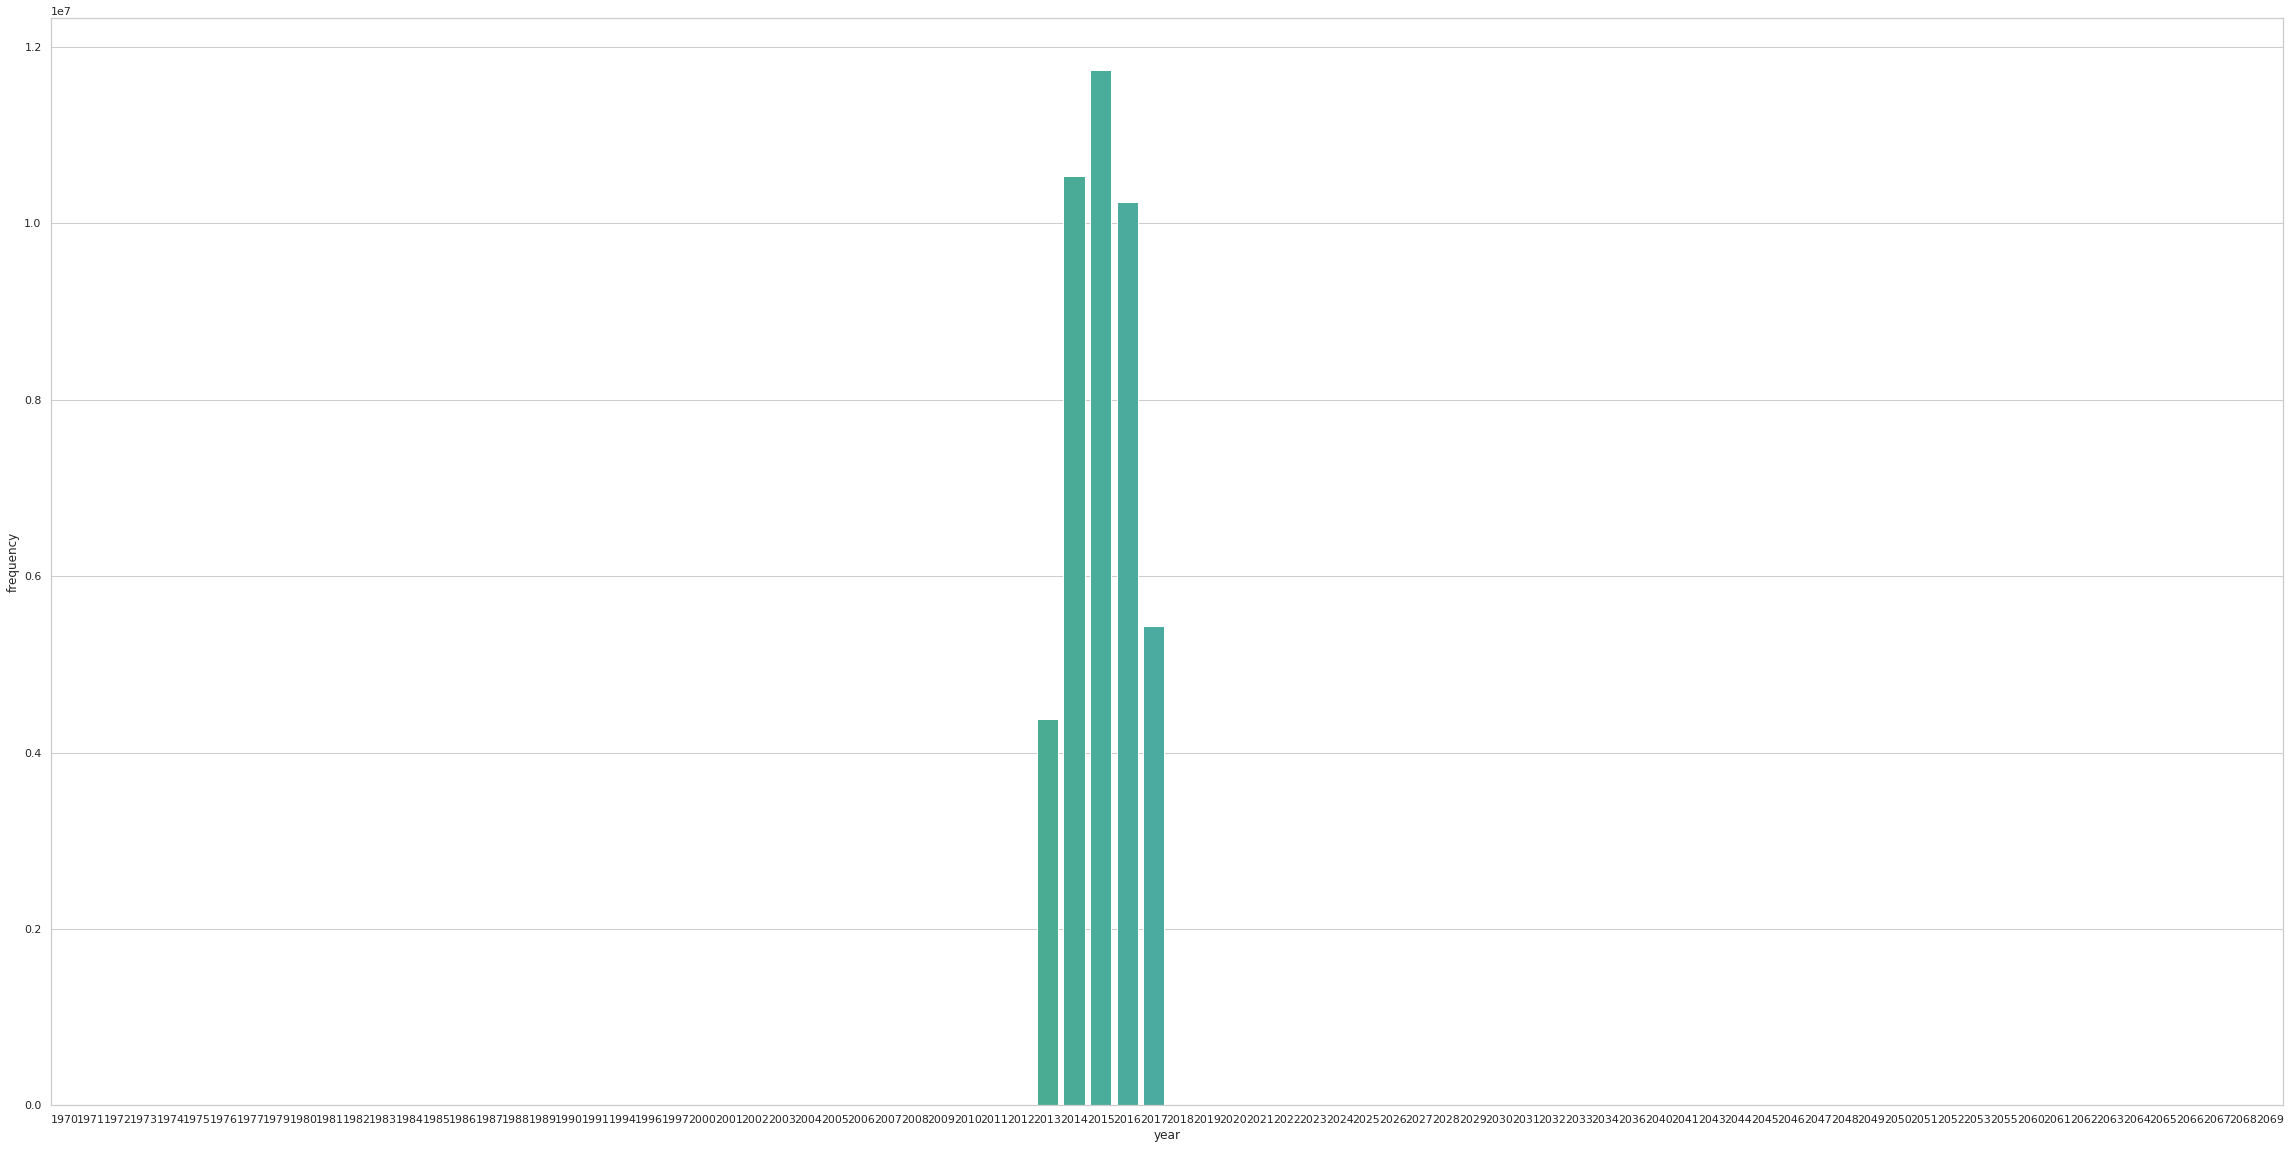

In [76]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
df_year_count = pd.DataFrame(year_count.items(),columns=['year','frequency'])
sns.barplot(x = "year", y = "frequency", ax=ax, data=df_year_count)

# Reading only Date like cols to see patterns in data

In [91]:
def plotbyDate(col_name):
    if not(col_name in ['Issue Date','Vehicle Expiration Date','Date First Observed']):
        raise ValueError("col_name should be in ['Issue Date','Vehicle Expiration Date','Date First Observed']")
    else:

        date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")

        data_2013_14 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
                                     usecols=[col_name],
                                     dtype={col_name:'str'},
                                     parse_dates=[col_name],
                                     date_parser=date_parser)

        data_2015 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2015.csv',
                           usecols=[col_name],
                           dtype={col_name:'str'},
                           parse_dates=[col_name],
                           date_parser=date_parser)

        data_2016 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2016.csv',
                           usecols=[col_name],
                           dtype={col_name:'str'},
                           parse_dates=[col_name],
                           date_parser=date_parser)

        data_2017 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
                           usecols=[col_name],
                           dtype={col_name:'str'},
                           parse_dates=[col_name],
                           date_parser=date_parser)

        year_count = defaultdict(int)
        month_count = {'January':0,
                       'February':0,
                       'March':0,
                       'April':0,
                       'May':0,
                       'June':0,
                       'July':0,
                       'August':0,
                       'September':0,
                       'October':0,
                       'November':0,
                       'December':0}


        data_13_17 = [data_2013_14,data_2015,data_2016,data_2017]

        for data in data_13_17:
            for date in data[col_name]:
                month_count[date.month_name()] += 1
                year_count[str(date.year)] += 1

        # month-wise plot
        fig_dims = (20, 8)
        fig, ax = plt.subplots(figsize=fig_dims)
        df_month_count = pd.DataFrame(month_count.items(),columns=['month','frequency'])
        sns.barplot(x = "month", y = "frequency", ax=ax, data=df_month_count)

        # year-wise plot
        fig_dims = (20, 8)
        fig, ax = plt.subplots(figsize=fig_dims)
        df_year_count = pd.DataFrame(year_count.items(),columns=['year','frequency'])
        sns.barplot(x = "year", y = "frequency", ax=ax, data=df_year_count)

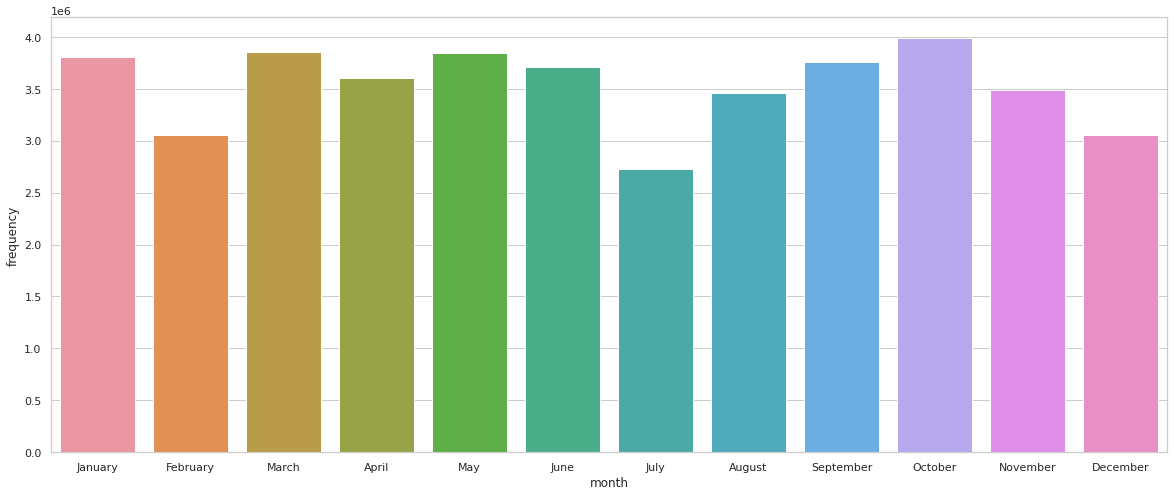

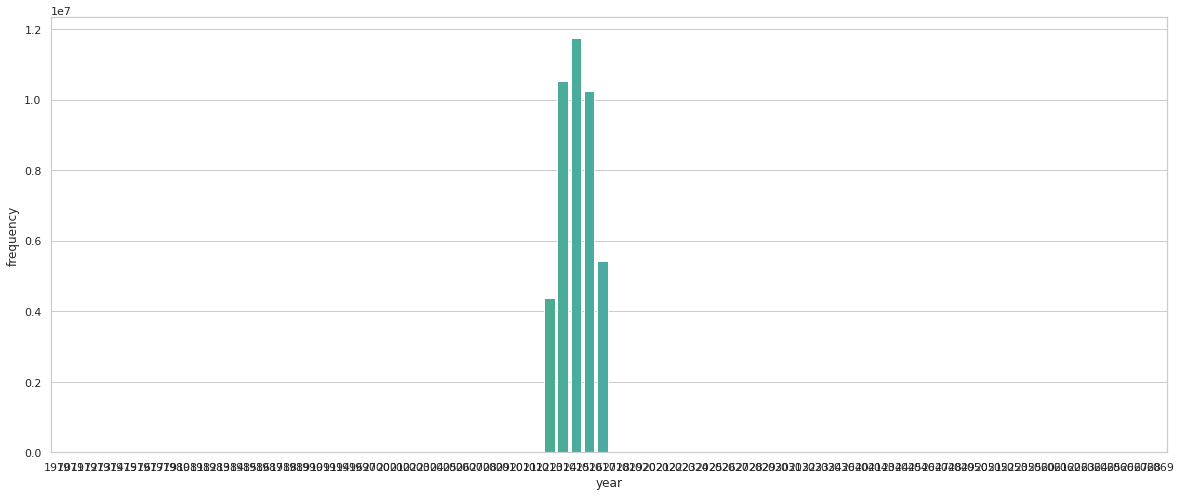

In [92]:
plotbyDate('Issue Date')

In [11]:
def plotbyDate_v1(col_name):
    if not(col_name in ['Issue Date','Vehicle Expiration Date','Date First Observed']):
        
        raise ValueError("col_name should be in ['Issue Date','Vehicle Expiration Date','Date First Observed']")
        
    else:
       
        data_2013_14 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
                             usecols=[col_name],
                             dtype={col_name:'str'})
        
        data_2015 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2015.csv',
                             usecols=[col_name],
                             dtype={col_name:'str'})        
        
        data_2016 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2016.csv',
                             usecols=[col_name],
                             dtype={col_name:'str'})        
        
        data_2017 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
                             usecols=[col_name],
                             dtype={col_name:'str'})        


        year_count = {'13-14' : defaultdict(int),
                      '15' : defaultdict(int),
                      '16' : defaultdict(int),
                      '17' : defaultdict(int)}
        
        month_count = {'13-14':{'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0},
                      '15':{'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0},
                      '16':{'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0},
                      '17':{'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0}}


        data_13_17 = {'13-14' : data_2013_14,
                      '15' : data_2015,
                      '16' : data_2016,
                      '17' : data_2017}
        
        def countData(data,year):
            for date in data[col_name]:
                breakpoint()
                if len(date) < 8 or not(isinstance(date,str)):
                        continue
                else:
                    if date[0:2] == '20':# means date format is yyyymmdd
                    try:
                        month_count[year][date.split('/')[1]] += 1
                        year_count[year][date.split('/')[0]] += 1

                    except:
                        month_count[year][str(date[4:6])] += 1
                        year_count[year][str(date[0:4])] += 1
            
            
                        
        for year,data in data_13_17.items() :
            countData(data,year)
            breakpoint()
        
#         cum_month_count = {'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0}
        
#         for year in month_count:
#             for month in month_count[year]:
#                 cum_month_count[month] += month_count[year][month] 
                
        
#         #plotting graphs year-wise
#         fig, ax = plt.subplots(figsize=(20,8))
        
#         for year,data in data_13_17.items():
#             # month-wise plot
#             df_month_count = pd.DataFrame(month_count[year].items(),columns=['month','frequency'])
#             sns.barplot(x = "month", y = "frequency", ax=ax, data=df_month_count)

#             # year-wise plot
#             df_year_count = pd.DataFrame(year_count[year].items(),columns=['year','frequency'])
#             sns.barplot(x = "year", y = "frequency", ax=ax, data=df_year_count)
        
#         df_cum_month_count = pd.DataFrame(cum_month_count.items(),columns=['month','frequency'])
#         sns.barplot(x="month",y="frequency",ax=ax,data=df_cum_month_count)

In [12]:
plotbyDate_v1('Issue Date')

> <ipython-input-11-89d4ee45a939>(44)countData()
-> if len(date) < 8 or not(isinstance(date,str)):
(Pdb) date
'08/04/2013'
(Pdb) len(date) < 8 or not(isinstance(date,str))
False
--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--
(Pdb) exit()


BdbQuit: 

In [14]:
string = 'asc'
string[0:2]

'as'

In [180]:
mystr = '08042013'
print(mystr.replace('/',''))
print(mystr)

08042013
08042013


In [183]:
x = float('nan')
math.isnan('08/04/2013'.replace('/'))

TypeError: must be real number, not str

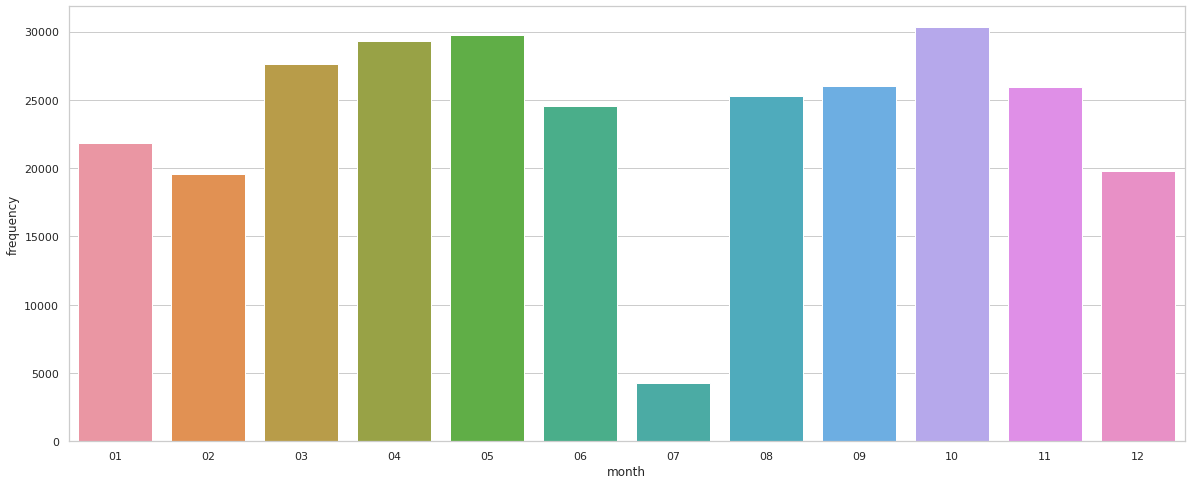

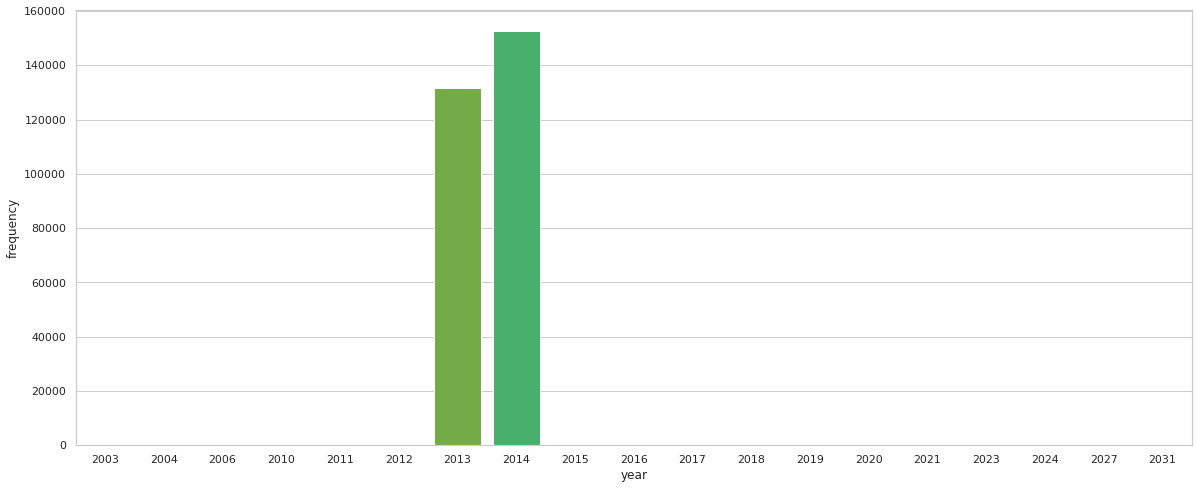

In [119]:
col_name = 'Date First Observed'
data_2013_14 = dd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
                             usecols=[col_name],
                             dtype={col_name:'str'})


year_count = defaultdict(int)

month_count = {'01':0,
               '02':0,
               '03':0,
               '04':0,
               '05':0,
               '06':0,
               '07':0,
               '08':0,
               '09':0,
               '10':0,
               '11':0,
               '12':0}




for date in data_2013_14[col_name]:
    if date == '0' or math.isnan(float(date)):
        continue
    else:
        month_count[str(date[4:6])] += 1
        year_count[str(date[0:4])] += 1

# # month-wise plot
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
df_month_count = pd.DataFrame(month_count.items(),columns=['month','frequency'])
sns.barplot(x = "month", y = "frequency", ax=ax, data=df_month_count)

# # year-wise plot
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
df_year_count = pd.DataFrame(year_count.items(),columns=['year','frequency'])
sns.barplot(x = "year", y = "frequency", ax=ax, data=df_year_count)

In [95]:
data_2013_14.head()

,Date First Observed
0,0
1,0
2,0
3,0
4,0


In [101]:
date_types = set()
for date in data_2013_14['Date First Observed']:
    date_types.add(date)
    

In [103]:
date_types

{'0',
 '20030101',
 '20030121',
 '20030305',
 '20031220',
 '20040203',
 '20060701',
 '20100505',
 '20100509',
 '20101201',
 '20110111',
 '20110227',
 '20110314',
 '20110321',
 '20110404',
 '20110425',
 '20110507',
 '20110512',
 '20120312',
 '20120609',
 '20120722',
 '20120804',
 '20120916',
 '20121006',
 '20121025',
 '20121102',
 '20121112',
 '20121131',
 '20121212',
 '20130103',
 '20130105',
 '20130106',
 '20130107',
 '20130108',
 '20130109',
 '20130110',
 '20130111',
 '20130114',
 '20130115',
 '20130116',
 '20130117',
 '20130119',
 '20130121',
 '20130122',
 '20130123',
 '20130125',
 '20130126',
 '20130130',
 '20130131',
 '20130202',
 '20130221',
 '20130222',
 '20130227',
 '20130313',
 '20130317',
 '20130324',
 '20130330',
 '20130403',
 '20130407',
 '20130412',
 '20130415',
 '20130416',
 '20130417',
 '20130423',
 '20130427',
 '20130428',
 '20130501',
 '20130503',
 '20130506',
 '20130508',
 '20130514',
 '20130518',
 '20130527',
 '20130529',
 '20130602',
 '20130604',
 '20130605',
 '2013

In [116]:
'0' in date_types

True

In [114]:
math.isnan(7)

False

In [93]:
plotbyDate('Date First Observed')

ValueError: time data '0' does not match format '%m/%d/%Y'

In [ ]:
'20110321'

In [124]:
'2011/03/21'.split('/')

['2011', '03', '21']

In [128]:
'2011/03/21'.split('/')[2]

'21'

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'